In [29]:
%pylab inline
import pandas as pd
from mpl_toolkits.mplot3d import axes3d

Populating the interactive namespace from numpy and matplotlib


In [30]:
%matplotlib notebook

In [31]:
def readf(file):
    df = pd.read_fwf(file)
    arr = df.to_numpy()
    return arr

In [32]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [33]:
def kw(arr,t):  
    
    if len(t) == 0:
        sys.exit('Please input a keyword')
    else:
        pass
    
    num = len(arr[:,0])
    ta = []
    for i in range(len(t)):
        ta.append(t[i])
    ta = array(ta)
    ix = arr[:,0]
    nme = arr[:,1]
    ky = arr[:,2]
    sv = arr[:,3]
    
    if len(where(ta == ':')[0])==1:
        if t == ':':
            b = arange(0,num,1)
            t = 'All'
            
        else:
            c = where(ta == ':')[0][0]
            
            if len(t[0:c])>0:
                A = int(t[0:c])
            else:
                lidx = 0
            
            if len(t[c+1:])>0:
                B = int(t[c+1:])
            else:
                ridx = num 
                   
            if c ==0:
                if len(where(ix == B)[0])==1:
                    ridx = where(ix == B)[0][0]+1
                else:
                    sys.exit('list out of range')
                
            elif c == len(t)-1:
                if len(where(ix == A)[0])==1: 
                    lidx = where(ix == A)[0][0]
                else:
                    sys.exit('list out of range')
                
            else:
                if len(where(arr[:,0] == A)[0])==1 and len(where(arr[:,0] == B)[0])==1:
                    if A<B:
                        lidx = where(ix == A)[0][0]
                        ridx = where(ix == B)[0][0]+1
                    else:
                        sys.exit('the second index must be greater than the first one')
                else:
                    sys.exit('list out of range')
                    
                    
            b = arange(lidx,ridx,1)
                
    else:
        if t.isnumeric() == True:
            if len(where(arr[:,0] == int(t))[0])>0: 
                b  = where(arr[:,0] == int(t))[0]
            else:
                sys.exit('can not find the target element')
                    
        else:
            if len(t)>=2:
                
                if t[1] == '*':  
                    keyword = []
                    for i in range(len(nme)):
                        keyword.append(nme[i][0])
                    keyword = array(keyword)
                    
                    if len(where(keyword == t[0])[0])>0:
                        b  = where(keyword == t[0])[0]
                        
                    else:
                        sys.exit('can not find the target element')
                
                elif 's ' in t and len(where(ta == ' ')[0])==2:
                    n1s = t.find('s ')+2
                    n1e = where(ta == ' ')[0][1]
                    n2s = where(ta == ' ')[0][1]+1
                    n1 = t[n1s:n1e] 
                    n2 = t[n2s:]
                    
                    if len(n1)>0 and len(n2)>0 and isfloat(n1) == True and isfloat(n2) == True:
                        
                        n1 = float(n1)
                        n2 = float(n2) 
                        
                        if n1>=0 and n2>0:
                            if n2 > n1:
                                if n2 <= max(sv)+5:
                                    if len(where(sv >= n1)[0])>0:
                                        A = where(sv >= n1)[0][0]
                                        if len(where(sv <= n2)[0])>0:
                                            B = where(sv <= n2)[0][-1]
                                            if A <= B: 
                                                b = arange(A,B+1,1)
                                            else:
                                                sys.exit('can not find any element in the given s range')
                                        else:
                                            sys.exit('upper boundry too small')
                                    else:
                                        sys.exit('lower boundry too big')
                                else:
                                    sys.exit('upper boundry too big (maybe exceeds the length of the ring)')
                                    
                            else:
                                sys.exit('the second number must be greater than the first one')
                            
                        else:
                            sys.exit('s can not a negative number')
                                
                                  
                    else:
                        sys.exit('must input two numbers')
                    
                    
                else:
                    if len(where(nme == t )[0])>0: 
                        b  = where(nme == t )[0]
                        
                    elif len(where(ky == t)[0])>0: 
                        b  = where(ky == t)[0]
            
                    else:
                        sys.exit('can not find the target element')
            else:
                sys.exit('Keyword too short')
    
    idx = arr[b,0]
    name = arr[b,1]
    key = arr[b,2]
    s  = arr[b,3]
    l = arr[b,4]
    sx = arr[b,5]
    sy = arr[b,6]
    sz = arr[b,7]
    
    return t,idx, name, key, s, l, sx, sy, sz

In [34]:
def rp(file,pt):
    if 'Ring' in file:
        pass
    
    else: 
        if '-Spin' in file:
            tidx = file.find('-Spin')-1
            tn = file[tidx]     
        else:
            sys.exit('wrong file name')
    
        if tn == 'L':
            if pt == '+':
                p1 = 'IP'
                p2 = 'L-Rot'
            else:
                p1 = 'L-Rot'
                p2 = 'IP'
            
        elif tn == 'R':
            if pt == '+':
                p1 = 'R-Rot'
                p2 = 'IP'
            else:
                p1 = 'IP'
                p2 = 'R-Rot'
        else:
            sys.exit('wrong file name')
        
        return tn,p1,p2

In [35]:
def pat(file):
    if '+' in file:
        return '+'
        
    elif '-' in file:
        return '-'   
    
    else:
        sys.exit('wrong particle type or particle type not defined')

In [36]:
def DF(idx, name, key, s, l, sx, sy, sz):
    pb=pd.DataFrame({'index':idx, 'name':name, 'key':key, 's (m)':s,\
                         'l (m)':l, 'spin.x':sx,'spin.y':sy,'spin.z':sz})
    pd.set_option('display.max_rows', None)
    display(pb)

In [37]:
def spdf(file,t):
    
    arr = readf(file)
    t, idx, name, key, s, l, sx, sy, sz = kw(arr,t)
    DF(idx, name, key, s, l, sx, sy, sz)

In [38]:
def sp(file,t):
    arr = readf(file)
    
    t, idx, name, key, s, l, sx, sy, sz = kw(arr,t)
    pt= pat(file)
    
    if len(sx)>= 150:
        pass
    else:
        DF(idx, name, key, s, l, sx, sy, sz)
    
    if 'Ring' in file:
        pass

    else:
        tn,p1,p2 = rp(file,pt)
    
    figure(figsize=(10, 8))
    
    if 'Ring' in file:
        if t == 'All':
            if 'Rot' in file:
                title(r'Spin Motion of $e ^%s$ (Co-Moving Frame) in the HER with Rot installed'%(pt),size =20)
            else:
                title(r'Spin Motion of $e ^%s$(Co-Moving Frame) in the orginal HER'%(pt),size =20)
                
        else:
            if 'Rot' in file:
                title(r'Spin Motion of $e ^%s$ in the HER with Rot installed(%s)'%(pt,t),size =20)
            else:
                title(r'Spin Motion of $e ^%s$ in the orginal HER(%s)'%(pt,t),size =20)

        
    else:
        if 'Sbend' in file:
            title(r'Spin motion of $e^%s$ at %s-Rot Candidate region'%(pt,tn),size =20) 
            
        elif 'Rot' in file:
            title(r'Spin Motion of $e ^%s$ in the %s-Rot Region (%s)'%(pt,tn,t),size =20)
                
        else:
            title(r'Spin motion of $e^%s$ between the %s and the %s(%s)'%(pt,p1,p2,t),size =20)
    
    if len(sx)>=500:
        plot(s,sx,'b-',label = r'$S_x$')
        plot(s,sy,'g-',label = r'$S_y$')
        plot(s,sz,'r-',label = r'$S_z$')
    else:
        plot(s,sx,'b-o',label = r'$S_x$')
        plot(s,sy,'g-o',label = r'$S_y$')
        plot(s,sz,'r-o',label = r'$S_z$')
    
    xlabel('s(m)',size = 20)
    ylabel('Spin Component',size = 20)
    legend(loc='best', fontsize = 15)
    show() 

# This is the instruction for the keyword searching


## it allows to search for the lattice elements by giving the initial : 
## e.g. 'B*' for all the sbend magnets whose initial is B such as B2E, BLA4LE,BLA6LE...; 'S*' for the Sad_multiple, if it has an attribute of B2, it's a sextupole such as SF2OLE, SF6TRE...; 'L*' for the drift; 'Q*' for the quadruple ...

$ $
$ $


## also can search for the full name of the lattice element:
## e.g. 'IP', 'B2E', 'QD3E' ...

$ $
$ $

## also can search for lattice element type:
## e.g. 'Quadrupole', 'Sbend', 'Sad_Mult', 'Drift', 'RFcavity'...
 

$ $
$ $ 


## also can search by giving the Index number:
## e.g. '1700' lattice element 1700;   '1700:1800' all the lattice element in that range [1700,1800]; '1500:' all elements from 1500 to the end of the lattice line; ':1100' all elements from the beginning of the lattice line to 1500;  ':' shows all elements in that file


$ $
$ $


## also allows to search by giving the s coordinate range:
## e.g. 's 0 100' search all the elements between s = 0 to 100


In [39]:
spdf("Ring-Spin(+).txt", 's 150 180')   # spdf only shows the spin data, does not do plotting 

,index,name,key,s (m),l (m),spin.x,spin.y,spin.z
0,1620,LTL102,Drift,150.467,0.687,-0.00836359,0.999963,-0.00220907
1,1621,LTL103,Drift,150.654,0.187,-0.00836359,0.999963,-0.00220907
2,1622,QLA9LE,Quadrupole,151.48,0.826,-0.00836359,0.999963,-0.00220915
3,1623,LTL104,Drift,151.667,0.187,-0.00836359,0.999963,-0.00220915
4,1624,MQLA9LE,Monitor,151.667,0.000,-0.00836359,0.999963,-0.00220915
5,1625,LTL105,Drift,151.75,0.083,-0.00836359,0.999963,-0.00220915
6,1626,ZVQLA9LE,Sbend,152.094,0.344,-0.00836359,0.999963,-0.00220915
7,1627,LTL106,Drift,154.704,2.610,-0.00836359,0.999963,-0.00220915
8,1628,ZHQLA10LE,Sbend,155.049,0.344,-0.00836359,0.999963,-0.00220915
9,1629,LTL107,Drift,155.132,0.083,-0.00836359,0.999963,-0.00220915


<IPython.core.display.Javascript object>


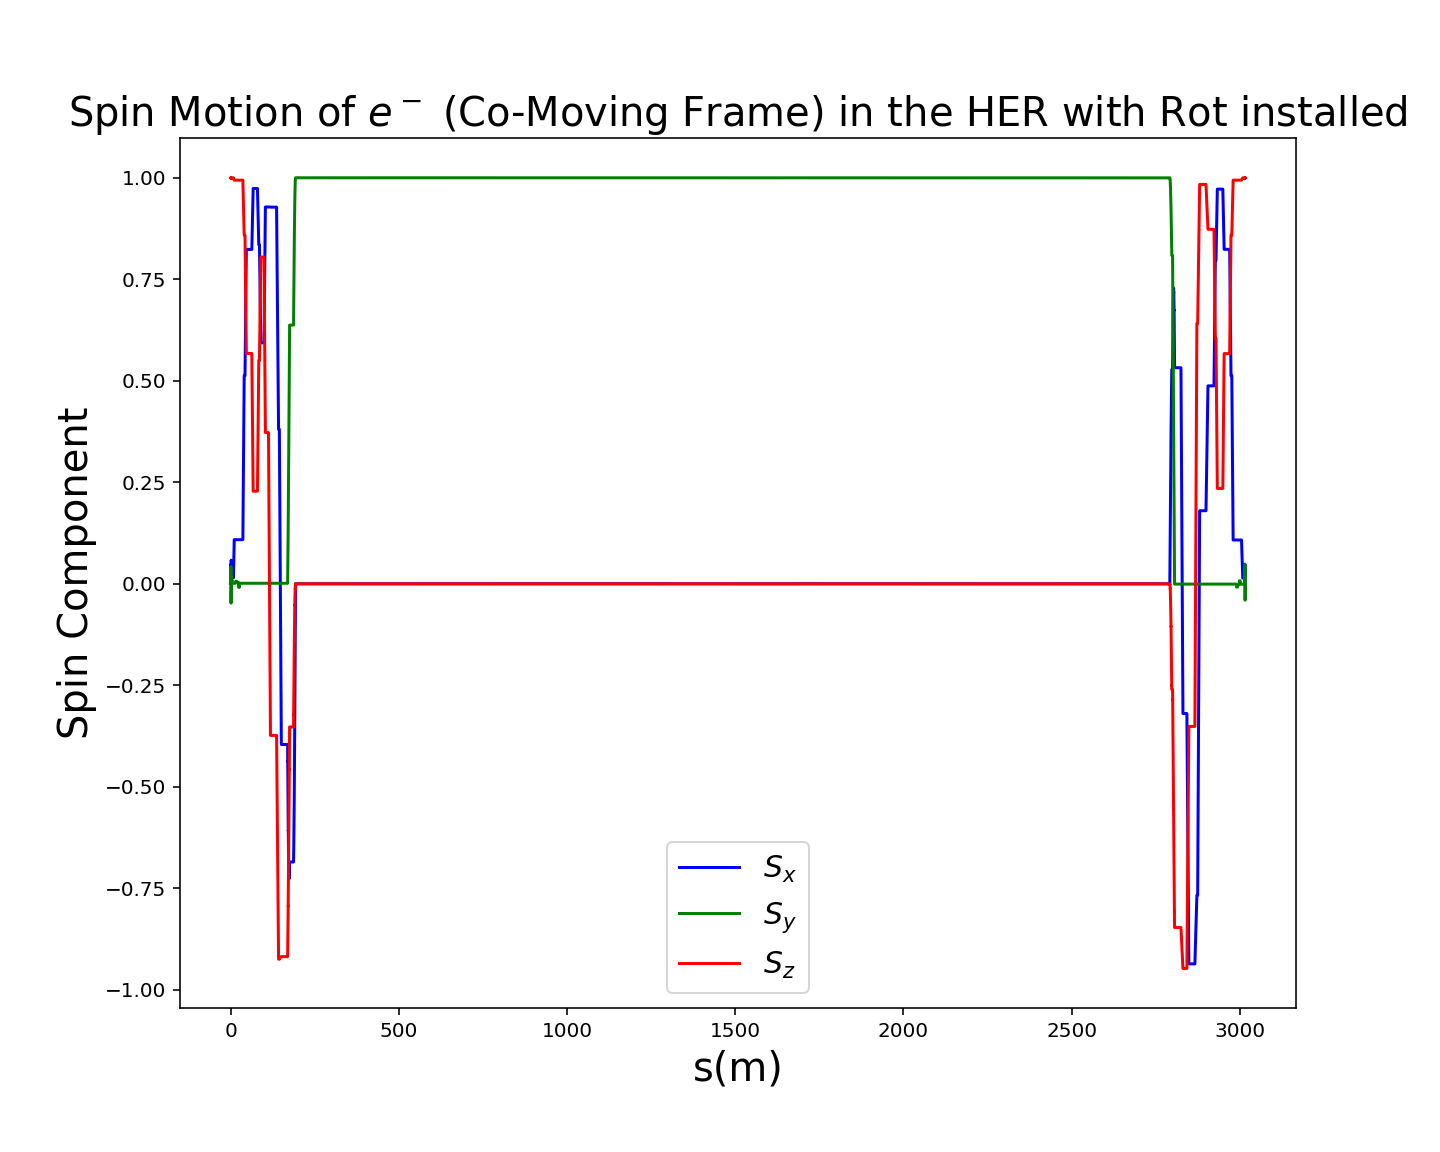

In [40]:
sp("Ring-Rot-Spin(-).txt",':')  #sp shows both the data and the plot
#if there is more than 150 elements, it does not show the data, only shows the plot

,index,name,key,s (m),l (m),spin.x,spin.y,spin.z
0,4409,B2E,Sbend,2379.34,5.902,0.936697,-0.00092463,-0.350141
1,4449,B2E,Sbend,2404.6,5.902,0.320883,-0.000924662,-0.947118
2,4455,B2E,Sbend,2412.85,5.902,-0.530988,-0.000924647,-0.847379
3,4485,B2E,Sbend,2437.76,5.902,-0.992246,-0.000924588,-0.124286
4,4505,B2E,Sbend,2455.36,5.902,-0.723588,-0.00092459,0.690231
5,4541,B2E,Sbend,2480.27,5.902,0.0773571,-0.000924544,0.997003
6,4547,B2E,Sbend,2488.52,5.902,0.8214,-0.000924526,0.570351
7,4581,B2E,Sbend,2513.43,5.902,0.961196,-0.000924577,-0.275863
8,4601,B2E,Sbend,2531.03,5.902,0.393918,-0.000924586,-0.919145
9,4637,B2E,Sbend,2555.94,5.902,-0.463136,-0.000924589,-0.886287


<IPython.core.display.Javascript object>


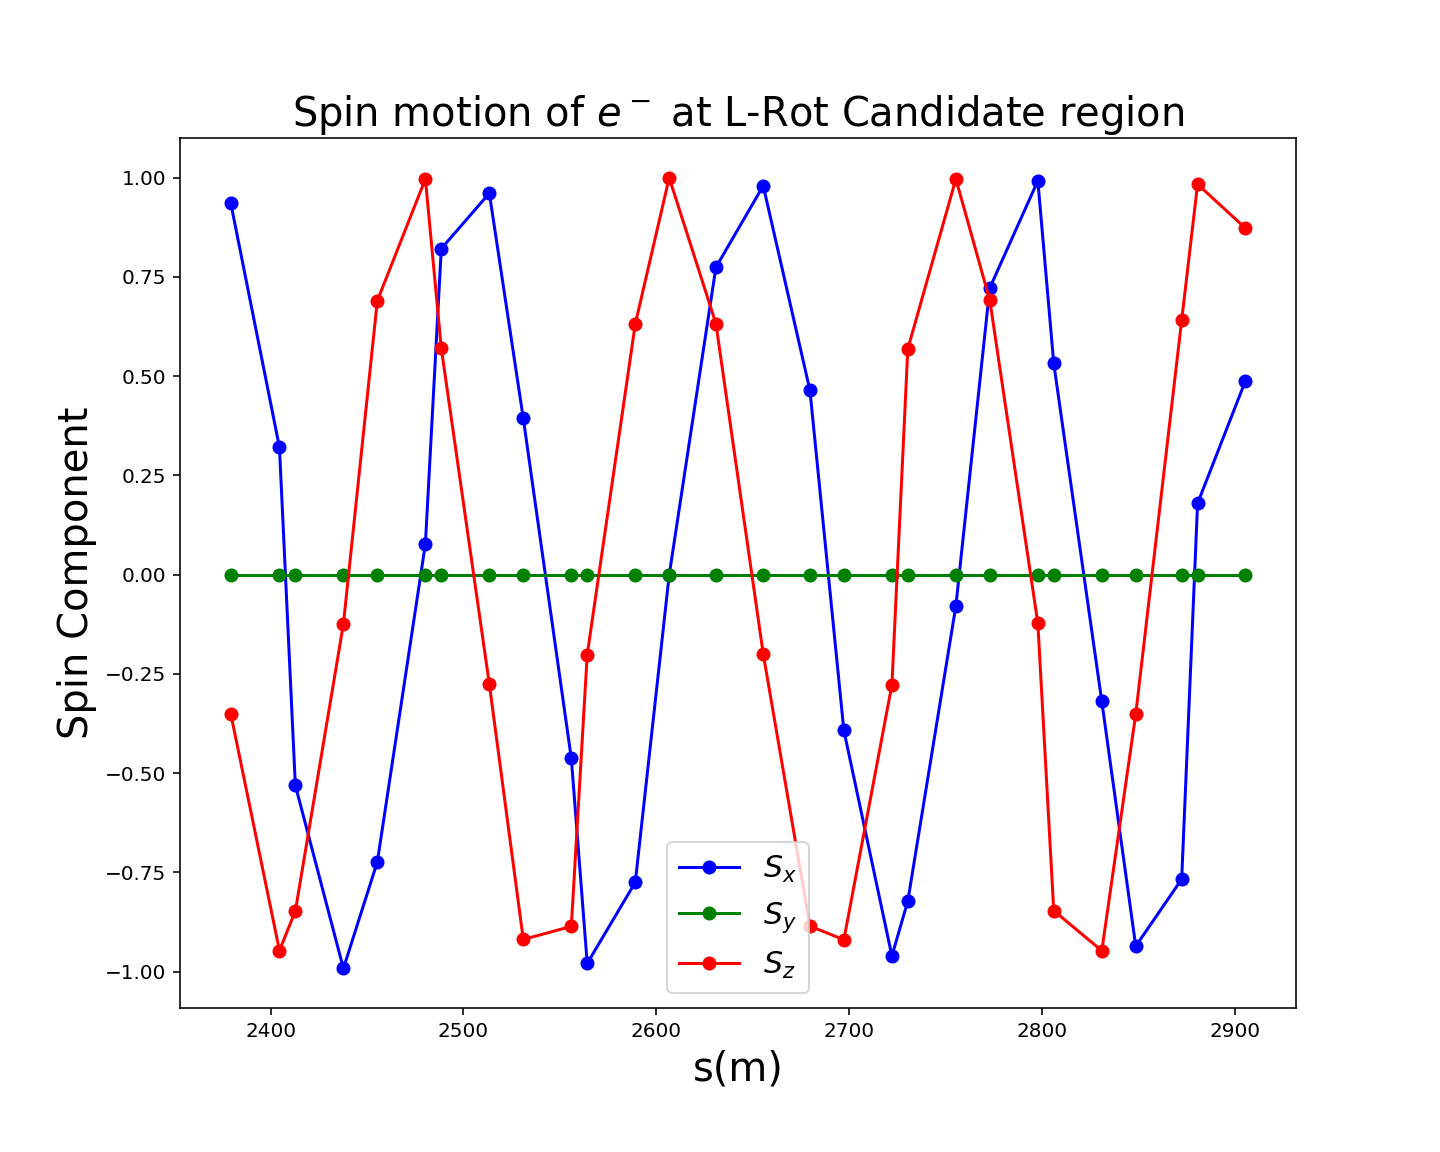

In [43]:
sp("Sbend-L-Spin(-).txt", ':')

<IPython.core.display.Javascript object>


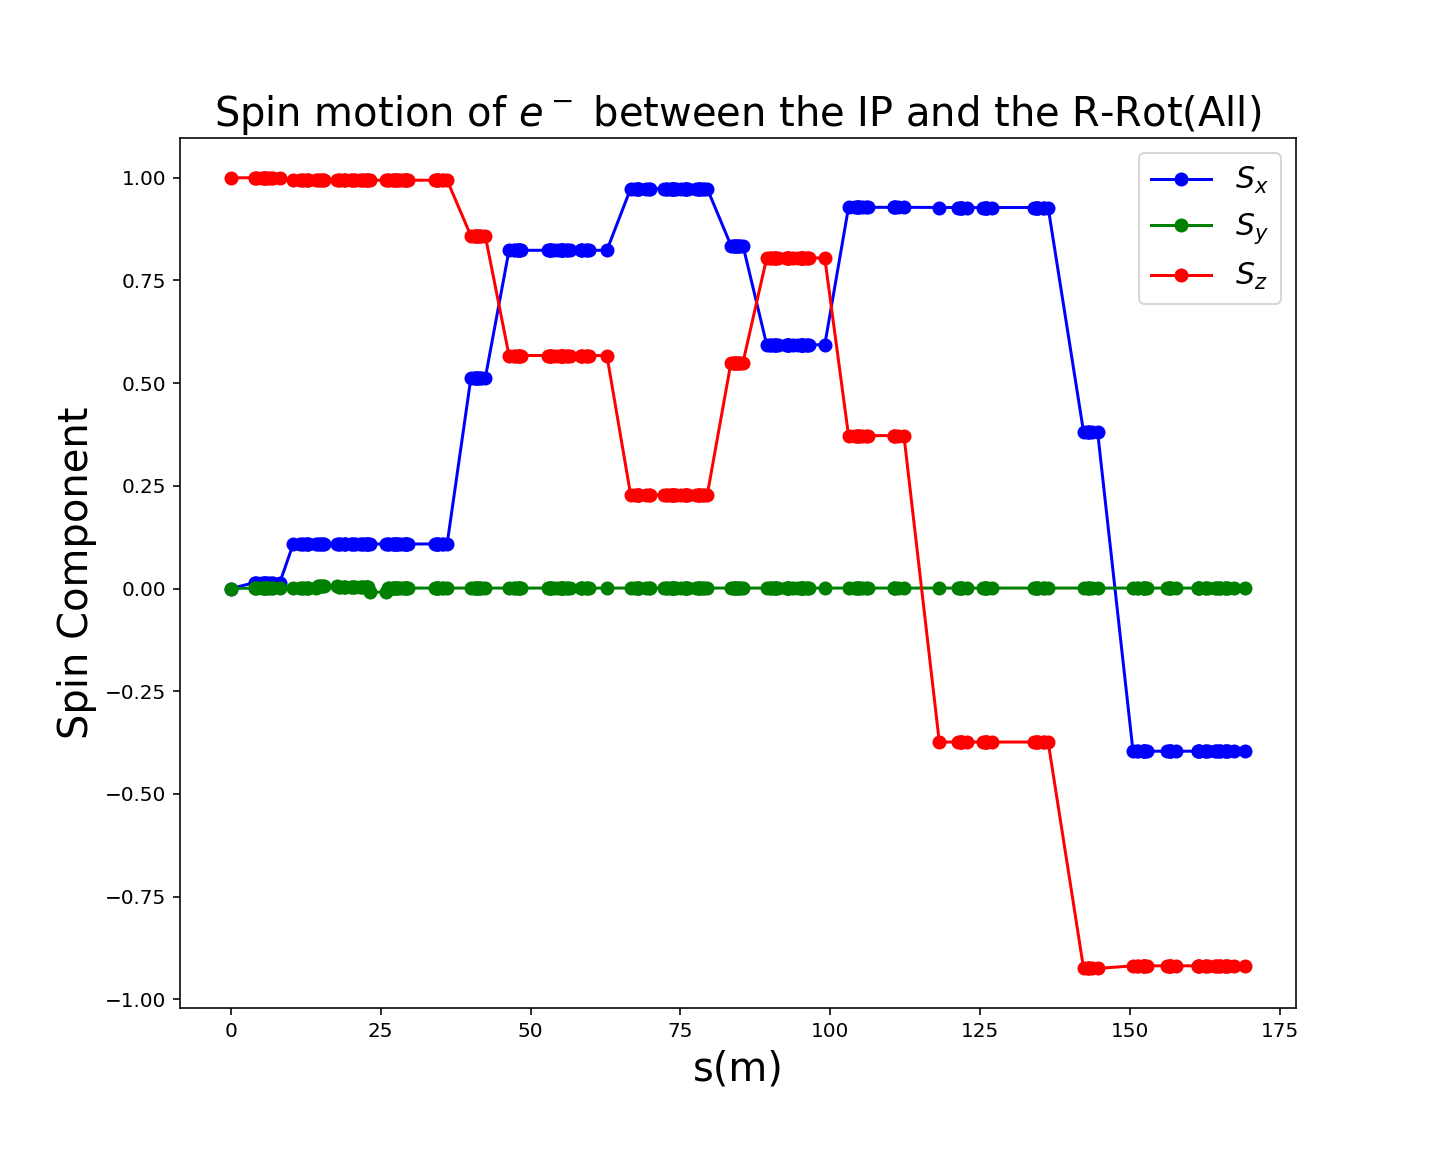

In [44]:
sp("R-Spin(-).txt",':') 

In [46]:
def rsp(file,t):
    if 'Rot-L-Spin' or 'Rot-R-Spin' in file:
        pass
    else:
        sys.exit('wrong file')
    tidx = file.find('-Spin')-1
    tn = file[tidx]    
    arr = readf(file)
    
    Wx =array([0,0]) 
    if tn == 'L':
        Wy =array([0.8225162754414257,  0.6098631930187012])
        Wz =array([-0.5687415728025907,-0.7925067102561557])
    elif tn == 'R':
        Wy =array([0.718471676118255, 0.6870002482601383])
        Wz =array([-0.6955562167185521,-0.7266571811318652])
    else:
        sys.exit('wrong file name')
                
    t,idx, name, key, s, l, sx, sy, sz = kw(arr,t)    
    
    ptype= pat(file)
    
    if t =='B*':
        se = array([sz,sx,sy])
        fig = figure(figsize=(12,10))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(se[0], se[1], se[2], c='gold', marker='.')
        
        wx = wy = wz = zeros(len(Wx))
        ax.quiver(wz, wx, wz, Wz, Wx, Wy, color ='darkorange',alpha = 0.5)        
        
        vec1 = array(se[0][::16])
        vec2 = array(se[1][::16])
        vec3 = array(se[2][::16])
        
        vec1 = append(vec1, se[0][-1])
        vec2 = append(vec2, se[1][-1])
        vec3 = append(vec3, se[2][-1])
        
        u = v = w = zeros(len(vec1))
        
        ax.quiver(u, v, w, vec1, vec2, vec3, color ='olive',alpha = 0.7)

        ax.set_xlim([min(vec1), max(vec1)])
        ax.set_ylim([min(vec2), max(vec2)])
        ax.set_zlim([min(vec3), max(vec3)])
        
        ax.set_xlabel('Z',fontsize=15)
        ax.set_ylabel('X',fontsize=15)
        ax.set_zlabel('Y',fontsize=15)
        ax.set_title(r'Spin Motion of $e ^%s$ (rest frame)in the %s-Rot Region'%(ptype,tn),size =20)
        show()
        
        figure(figsize=(10, 8))
        num = arange(1,len(sx)+1)
        plot(num,sx,'b-',label = r'$S_x$')
        plot(num,sy,'g-',label = r'$S_y$')
        plot(num,sz,'r-',label = r'$S_z$')
        xlabel('element number',size = 15)
        ylabel('Spin Component',size = 15)
        title(r'Spin Motion of $e ^%s$ in the %s-Rot Region'%(ptype,tn),size =20)
        legend(loc='best', fontsize = 15)
        show()
            
    else:
        figure(figsize=(10, 8))
        plot(s,sx,'b-o',label = r'$S_x$')
        plot(s,sy,'g-o',label = r'$S_y$')
        plot(s,sz,'r-o',label = r'$S_z$')
        xlabel('s(m)',size = 15)
        ylabel('Spin Component',size = 15)
        title(r'Spin Motion of $e ^%s$ in the %s-Rot Region (%s)'%(ptype,tn,t),size =20)
        legend(loc='best', fontsize = 15)
        show()

<IPython.core.display.Javascript object>


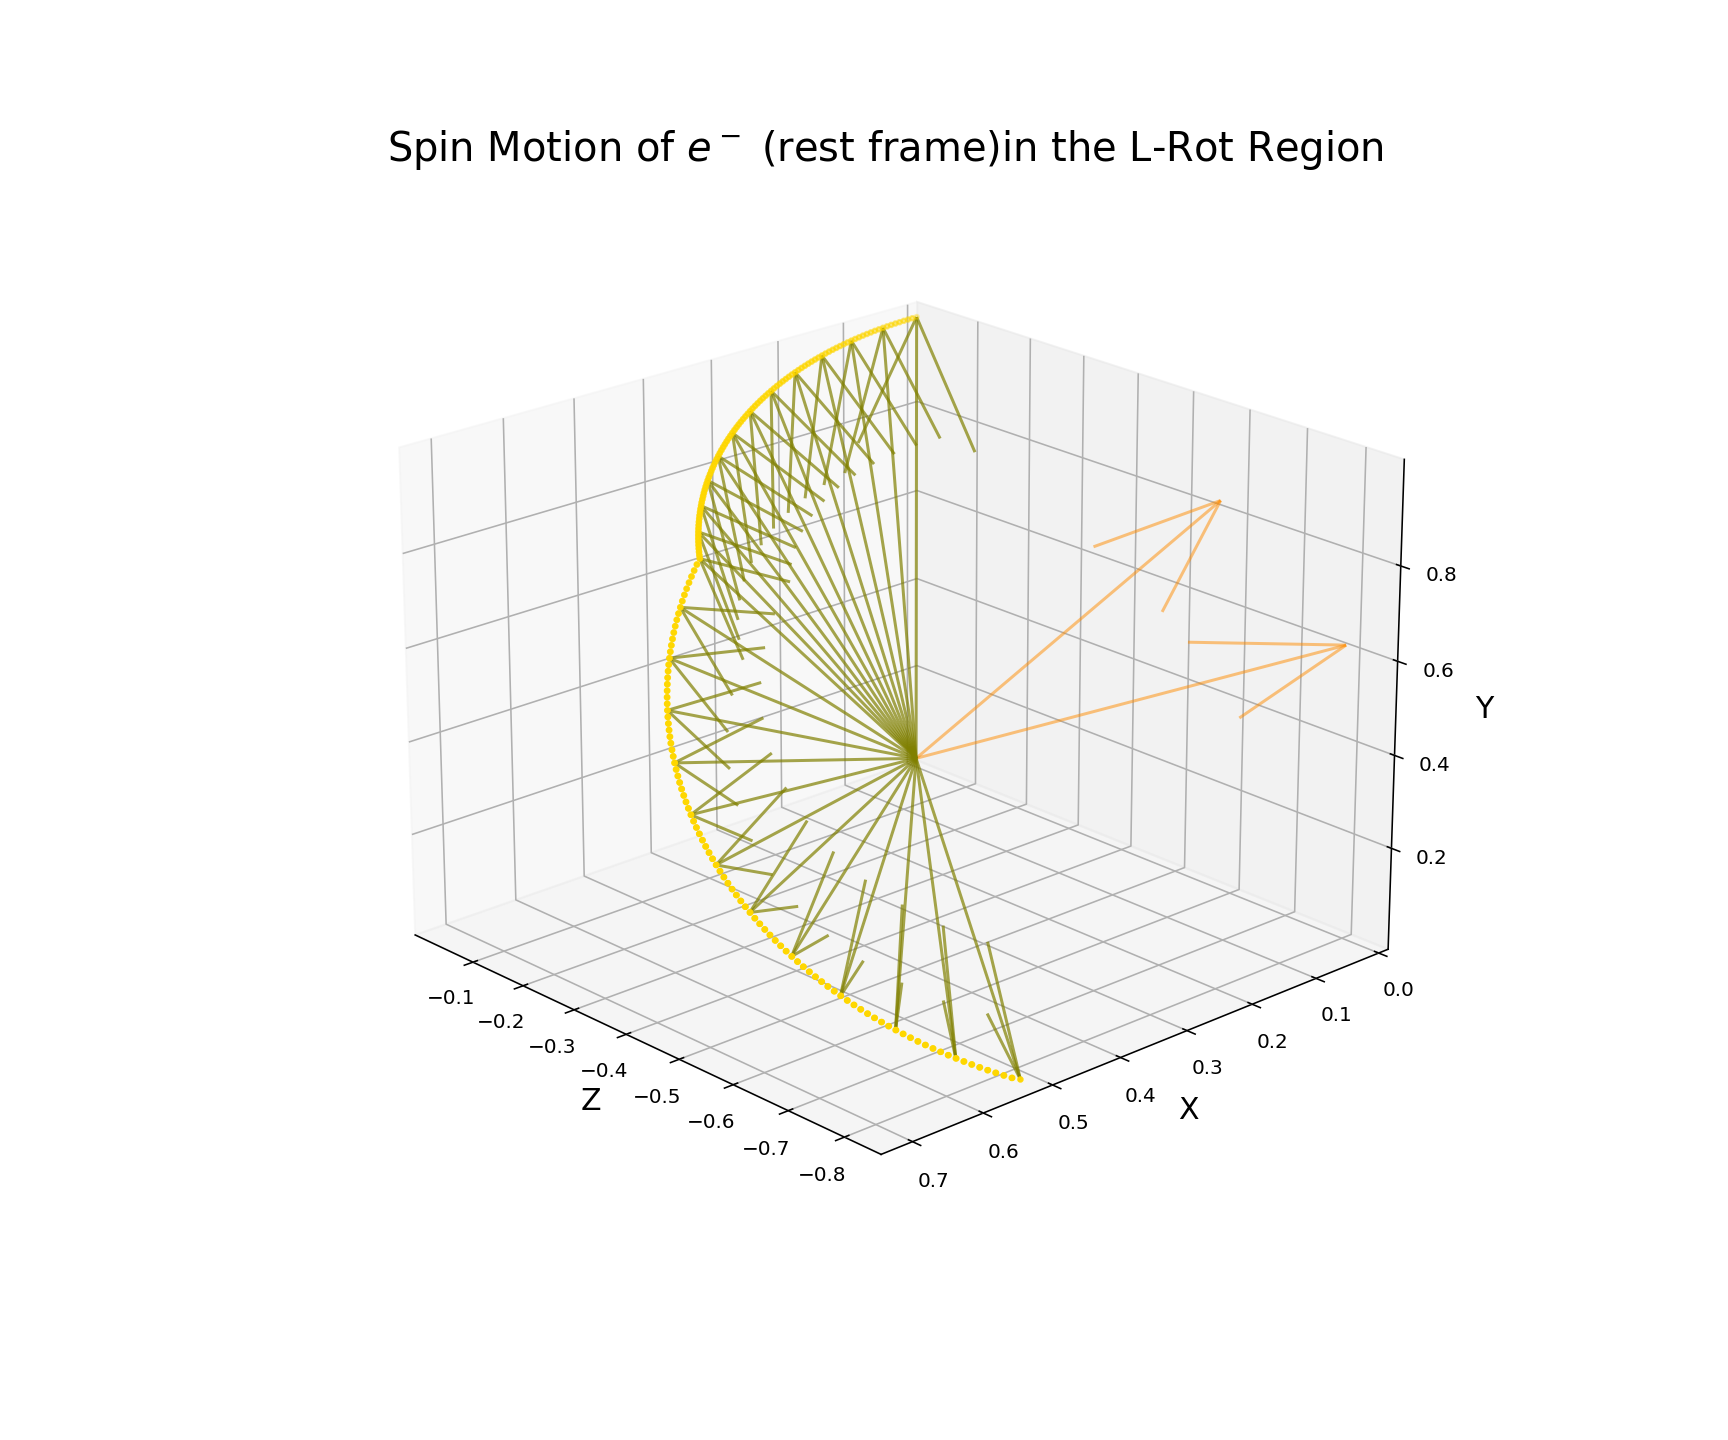

<IPython.core.display.Javascript object>


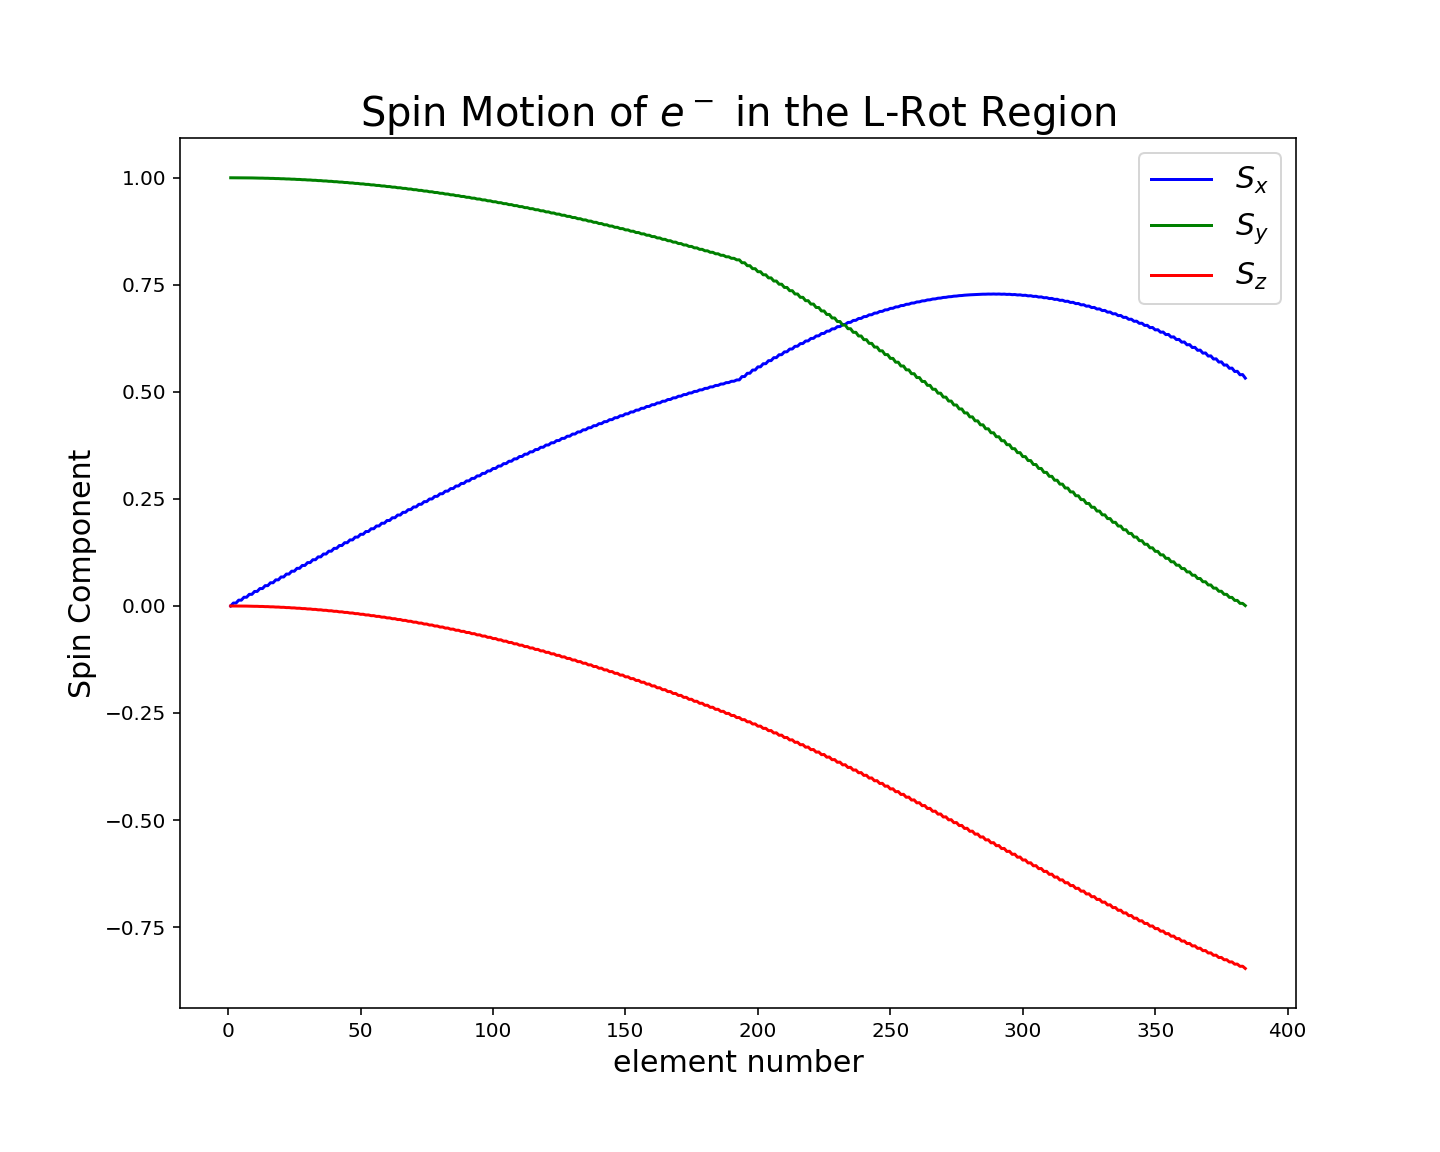

In [47]:
rsp("Rot-L-Spin(-).txt",'B*') # rsp does spin motion plots in rest frame
# only available for 'Rot-L-Spin(-).txt' or Rot-R-Spin(-).txt' which is spin data at the Rot region
# the keyword has to be 'B*' to show the 3d spin motion plot(rest frame)

<IPython.core.display.Javascript object>


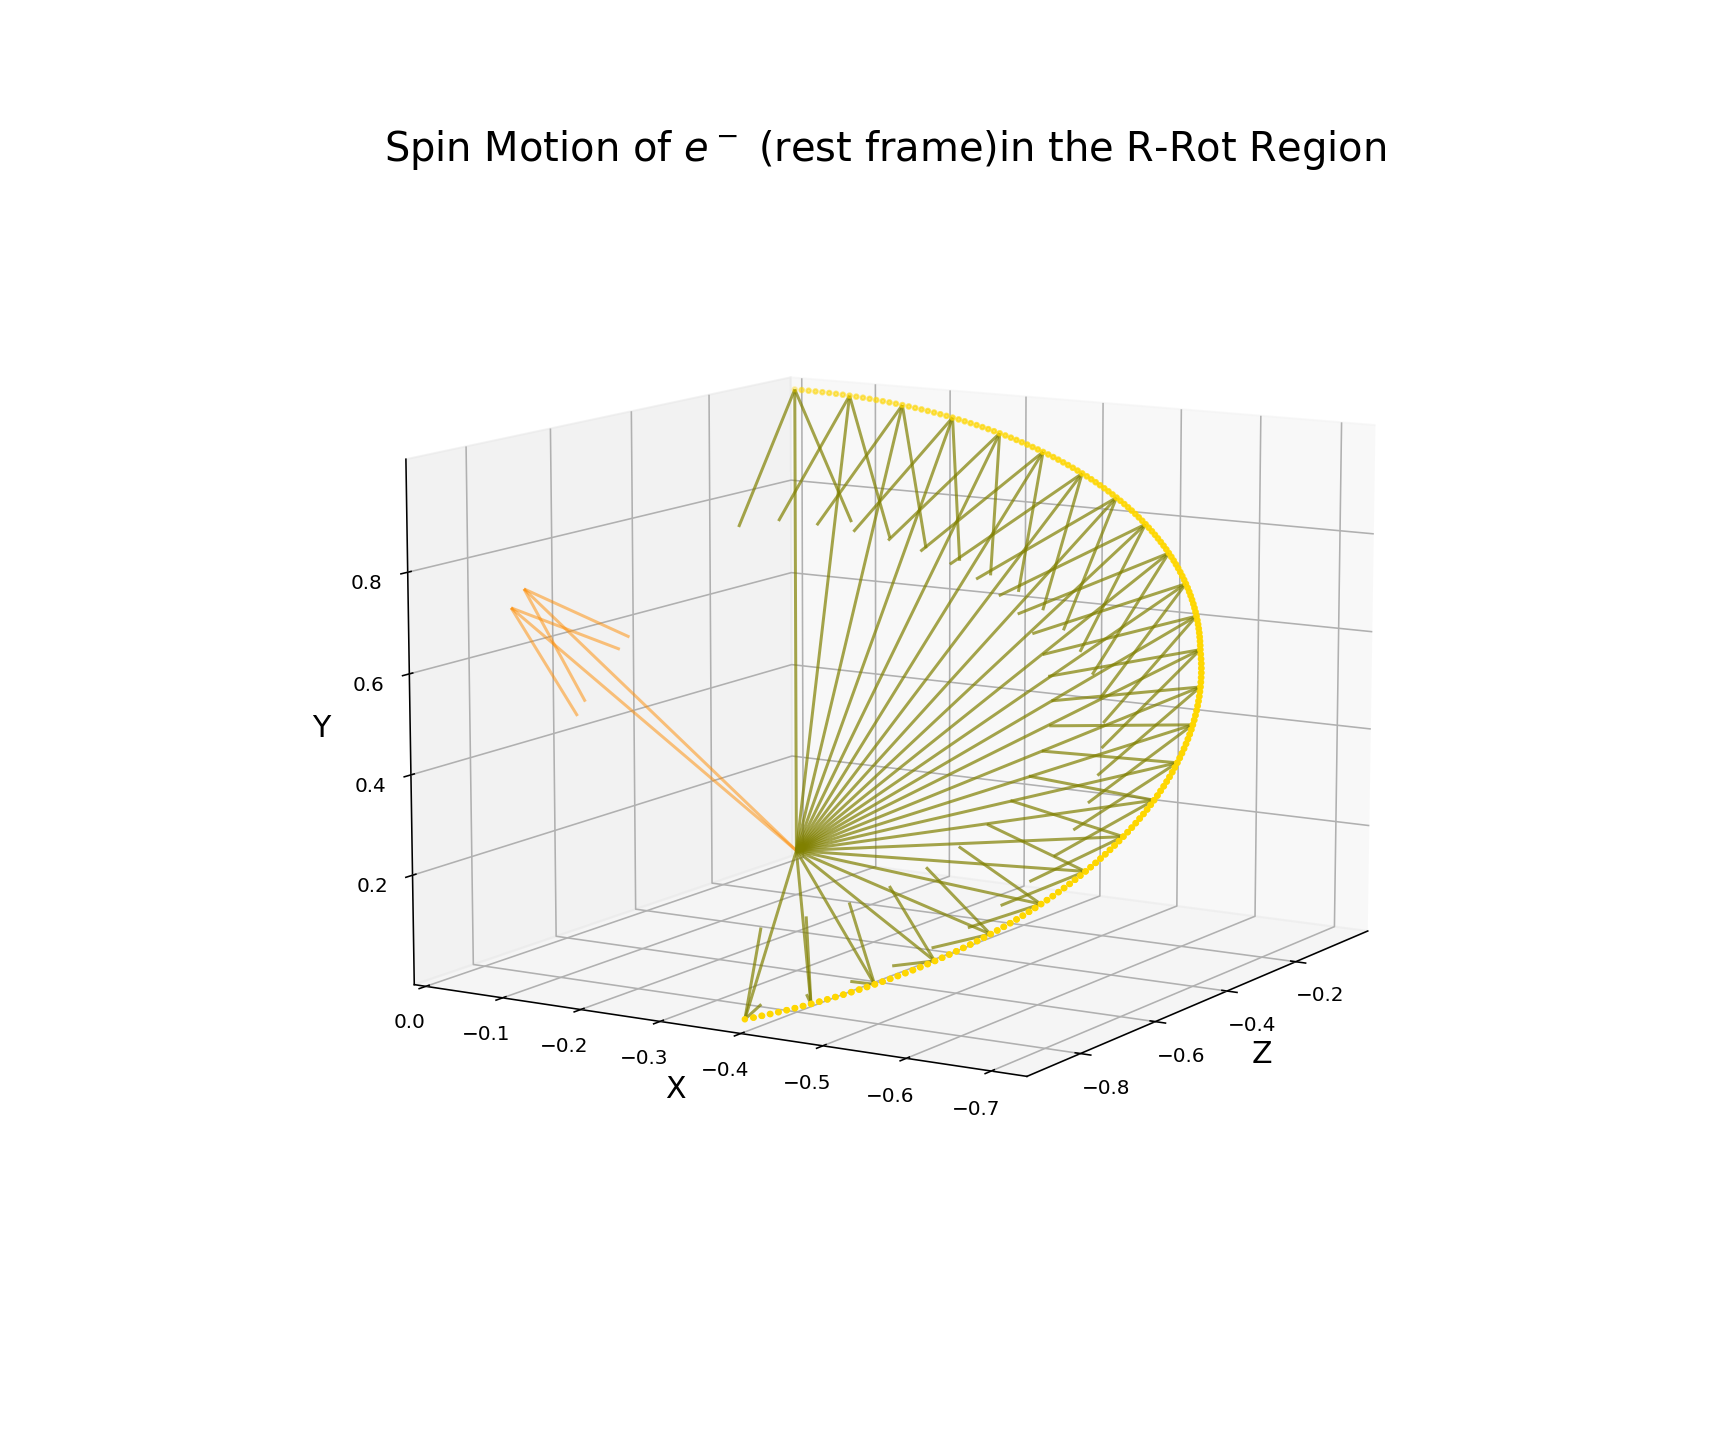

<IPython.core.display.Javascript object>


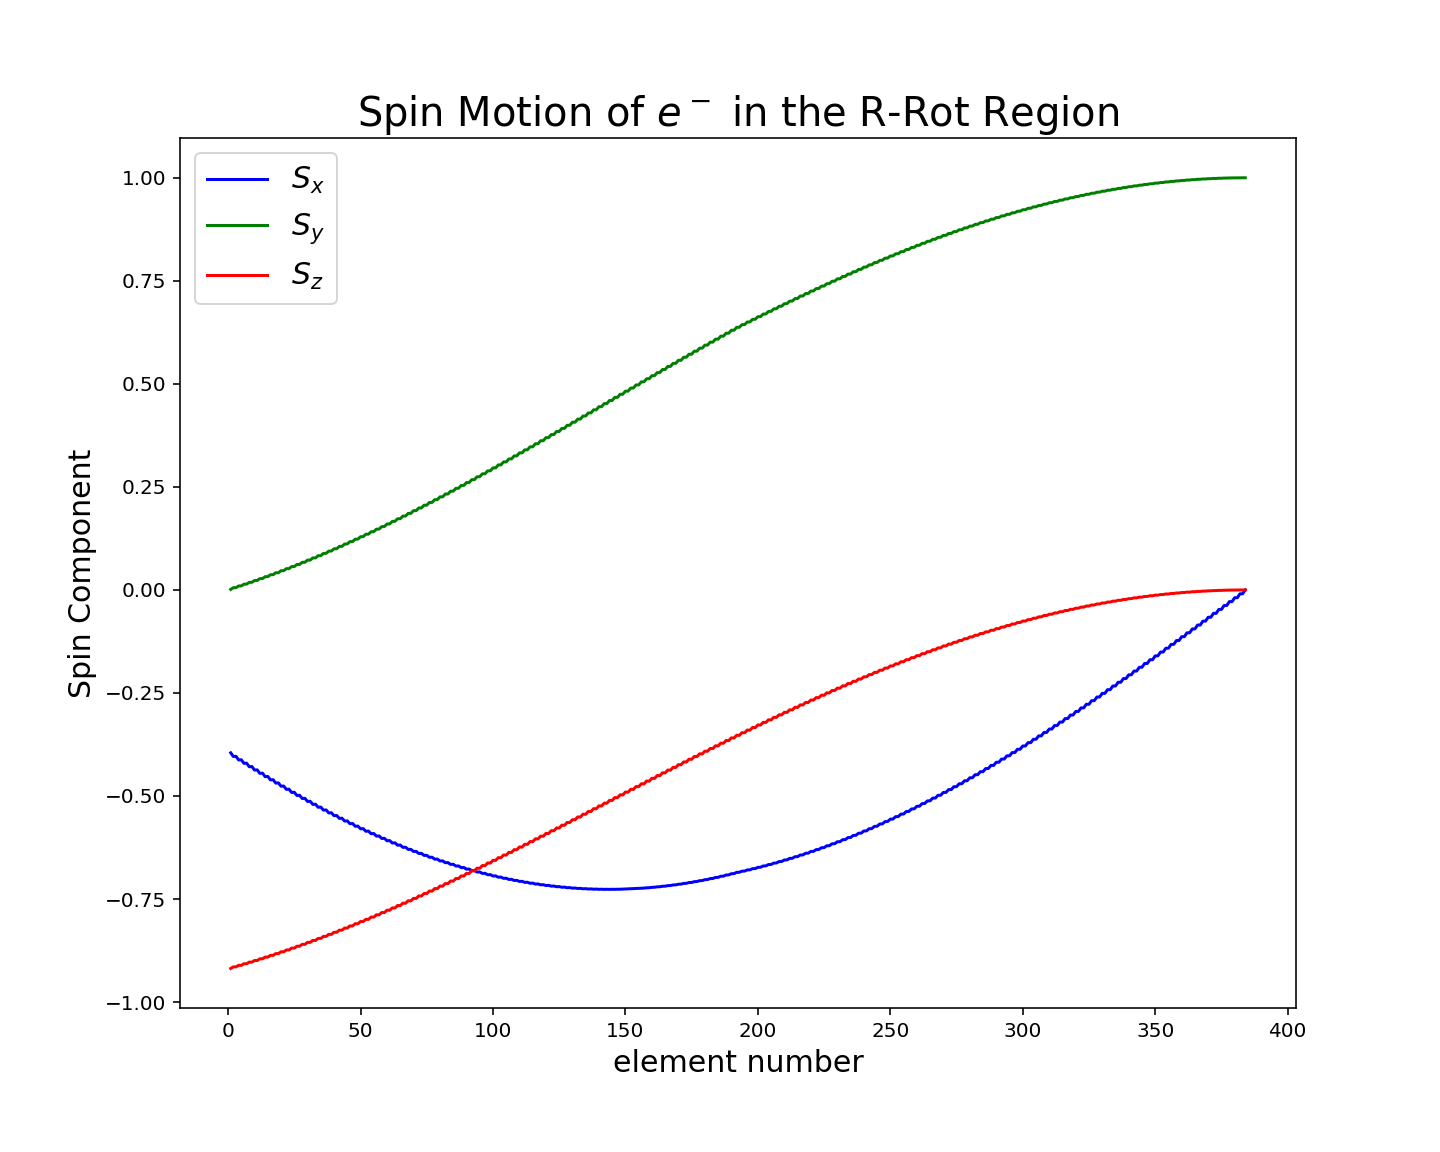

In [48]:
rsp("Rot-R-Spin(-).txt",'B*')